# Prepare dataset (protein only)

> In this module, we prepare protein sequence embeddings with target values

## Setup

In [ ]:
from fastbook import *
from katlas.core import *
from katlas.feature import *
from katlas.train import *
from katlas.plot import *

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split, StratifiedGroupKFold
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr,pearsonr

from sklearn.preprocessing import StandardScaler
import seaborn as sns


import xgboost as xgb
import joblib

# import matplotlib.pyplot as plt

from pathlib import Path
import math

## Standardize target

In [ ]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [ ]:
combine = pd.read_csv('raw/combine_freq.csv').set_index('kinase')

In [ ]:
p0 = StandardScaler().fit_transform(combine.iloc[:,-3:].T).T

p = StandardScaler().fit_transform(combine.iloc[:,:-3].T).T

v = pd.concat([p,p0],axis=1)

In [ ]:
v

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,-5F,-5Y,-5W,-5H,-5K,-5R,-5Q,-5N,-5D,-5E,-5s,-5t,-5y,-4P,-4G,-4A,-4C,-4S,-4T,-4V,-4I,-4L,-4M,-4F,-4Y,-4W,-4H,-4K,-4R,-4Q,-4N,-4D,-4E,-4s,-4t,-4y,-3P,-3G,-3A,-3C,-3S,-3T,-3V,-3I,-3L,-3M,-3F,-3Y,-3W,-3H,-3K,-3R,-3Q,-3N,-3D,-3E,-3s,-3t,-3y,-2P,-2G,-2A,-2C,-2S,-2T,-2V,-2I,-2L,-2M,-2F,-2Y,-2W,-2H,-2K,-2R,-2Q,-2N,-2D,-2E,-2s,-2t,-2y,-1P,-1G,-1A,-1C,-1S,-1T,-1V,-1I,-1L,-1M,-1F,-1Y,-1W,-1H,-1K,-1R,-1Q,-1N,-1D,-1E,-1s,-1t,-1y,1P,1G,1A,1C,1S,1T,1V,1I,1L,1M,1F,1Y,1W,1H,1K,1R,1Q,1N,1D,1E,1s,1t,1y,2P,2G,2A,2C,2S,2T,2V,2I,2L,2M,2F,2Y,2W,2H,2K,2R,2Q,2N,2D,2E,2s,2t,2y,3P,3G,3A,3C,3S,3T,3V,3I,3L,3M,3F,3Y,3W,3H,3K,3R,3Q,3N,3D,3E,3s,3t,3y,4P,4G,4A,4C,4S,4T,4V,4I,4L,4M,4F,4Y,4W,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y,0s,0t,0y
SRC,0.187059,0.803729,0.846753,-1.117988,-0.386588,-0.601706,0.043647,0.244423,1.047529,-1.003259,-0.400929,-1.519541,-1.290082,-0.816823,1.205282,0.129694,0.115353,-0.028059,1.721564,2.582035,-0.530000,-0.845506,-0.386588,0.413387,1.315492,0.556578,-1.032845,-0.273931,-0.732143,0.227238,-0.216655,1.329811,-1.047164,-0.517356,-1.433780,-1.419461,-0.875334,0.298834,0.384749,-0.073463,-0.016187,1.716428,2.303512,0.370430,-0.846696,-0.431442,0.211511,0.926918,1.155848,-1.319458,-0.532511,-0.689901,0.325977,-0.418046,0.368901,-1.147761,-0.790058,-1.348075,-1.319458,-0.861598,0.569215,-0.031727,0.569215,-0.074651,1.856946,3.645463,-0.017419,-0.804366,-0.274965,0.825822,1.397927,0.611282,-1.219455,-0.661652,-0.976310,0.382440,-0.289784,0.282322,-1.219455,-0.590139,-1.505508,-1.348179,-0.733166,0.697098,-0.375600,0.225111,0.411045,1.998638,2.356204,0.353835,-0.375600,-0.246876,0.525466,0.153598,0.768611,-1.033521,-0.861889,-0.861889,2.170270,1.483743,1.912822,-1.305271,-0.203968,-1.433995,-1.333876,-0.575837,-0.332692,-0.804679,-0.261179,-0.146757,0.811519,1.769796,-0.361297,-0.132455,0.053479,-0.874188,2.094435,0.846753,-1.103647,-0.443953,-1.089306,0.861094,0.287447,0.689000,-1.089306,-0.357906,-1.505200,-1.376129,-0.888529,0.359153,-0.458294,0.373494,-0.142788,1.678541,2.696764,-0.013718,-0.486976,-0.056741,0.225687,0.860117,1.061981,-0.999918,-0.437581,-0.754797,1.033144,-0.105947,1.206170,-0.956661,-0.437581,-1.432484,-1.216201,-0.913404,-0.134785,-0.005015,0.067079,0.081498,1.004306,2.374099,0.139173,-0.639446,-0.019434,0.942127,0.536830,0.811853,-1.040933,-0.548787,-0.823810,0.855277,0.276282,2.780438,-0.983034,0.059158,-1.200157,-1.315956,-0.635637,0.160482,0.406556,-0.505362,-0.157965,0.753953,0.942127,-0.215865,-0.838285,-0.259289,0.469325,1.180252,0.803026,-1.170159,-0.430215,-0.938020,0.759499,-0.154549,1.006148,-0.879985,-0.401197,-1.286229,-1.286229,-0.763915,1.383374,0.991639,-0.183567,-0.357671,0.948113,2.007249,-0.473741,-0.763915,-0.459232,-0.719765,-0.694373,1.414138
EPHA3,-0.046952,0.771152,0.558445,-1.126849,-0.145124,-0.685073,-0.014228,-0.112400,0.558445,-1.012314,-0.390556,-1.208659,-1.208659,-0.734159,1.376549,0.951135,0.885686,0.165755,1.147479,2.031032,-0.619625,-0.914142,-0.226935,0.079451,1.352079,0.585239,-1.013704,-0.312127,-0.703705,0.422081,-0.083707,0.895238,-0.866863,-0.410022,-1.405282,-1.372651,-0.834231,0.829975,0.699449,-0.344759,-0.246864,1.792604,2.102603,0.193661,-0.768968,-0.589495,0.209168,1.562737,0.943031,-1.225940,-0.818239,-0.785623,0.372249,0.029780,0.991955,-1.128092,-0.606234,-1.372712,-1.356404,-0.655158,0.910415,0.339633,0.095012,-0.116993,1.073495,2.084594,0.192860,-0.785623,0.046088,1.073495,1.106111,0.779950,-1.111784,-0.606234,-0.850855,-0.214841,-0.002836,0.127628,-1.095476,-0.850855,-1.454253,-1.258556,-0.883471,1.073495,0.013472,0.307017,-0.035452,1.057187,2.459679,0.567946,-0.475770,0.274401,-0.753006,-0.019144,0.339633,-1.225940,-1.030243,-0.753006,0.910415,0.682102,1.758433,-1.340096,-0.361613,-1.454253,-1.274864,-0.948703,-0.068068,-0.459462,-0.394229,1.024571,2.573836,2.427063,-0.035452,-0.100684,0.502713,-1.029349,1.437821,0.898638,-0.963994,-1.078366,-1.339788,1.601210,0.212405,0.784266,-0.833283,-0.702572,-1.437821,-0.571861,-0.784266,

In [ ]:
def get_heatmap2(df, # Stacked Dataframe with kinase as index, substrates as columns
                kinase # A specific kinase name in index
               ):
    aa_order = [i for i in 'PGACSTVILMFYWHKRQNDEsty']
    # position_order = [str(i) for i in range(-5,5)]
    # position_order.remove('0')
    
    kk = get_one_kinase(df, kinase,drop_s=False).T
    # kkk = kk.reindex(index=aa_order, columns=position_order)
    kkk = kk.reindex(index=aa_order)
    
    plt.figure(figsize=(6, 10))
    sns.heatmap(kkk, cmap='binary', annot=False)
    plt.title(kinase)

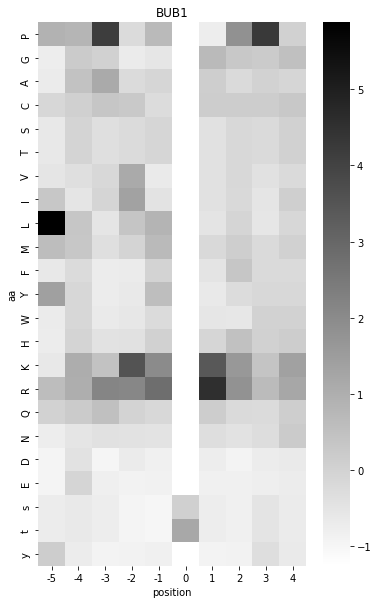

In [ ]:
get_heatmap2(v,'BUB1')

In [ ]:
target = v.reset_index().rename(columns={'index':'kinase'})

In [ ]:
target

,kinase,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,-5F,-5Y,-5W,-5H,-5K,-5R,-5Q,-5N,-5D,-5E,-5s,-5t,-5y,-4P,-4G,-4A,-4C,-4S,-4T,-4V,-4I,-4L,-4M,-4F,-4Y,-4W,-4H,-4K,-4R,-4Q,-4N,-4D,-4E,-4s,-4t,-4y,-3P,-3G,-3A,-3C,-3S,-3T,-3V,-3I,-3L,-3M,-3F,-3Y,-3W,-3H,-3K,-3R,-3Q,-3N,-3D,-3E,-3s,-3t,-3y,-2P,-2G,-2A,-2C,-2S,-2T,-2V,-2I,-2L,-2M,-2F,-2Y,-2W,-2H,-2K,-2R,-2Q,-2N,-2D,-2E,-2s,-2t,-2y,-1P,-1G,-1A,-1C,-1S,-1T,-1V,-1I,-1L,-1M,-1F,-1Y,-1W,-1H,-1K,-1R,-1Q,-1N,-1D,-1E,-1s,-1t,-1y,1P,1G,1A,1C,1S,1T,1V,1I,1L,1M,1F,1Y,1W,1H,1K,1R,1Q,1N,1D,1E,1s,1t,1y,2P,2G,2A,2C,2S,2T,2V,2I,2L,2M,2F,2Y,2W,2H,2K,2R,2Q,2N,2D,2E,2s,2t,2y,3P,3G,3A,3C,3S,3T,3V,3I,3L,3M,3F,3Y,3W,3H,3K,3R,3Q,3N,3D,3E,3s,3t,3y,4P,4G,4A,4C,4S,4T,4V,4I,4L,4M,4F,4Y,4W,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y,0s,0t,0y
0,SRC,0.187059,0.803729,0.846753,-1.117988,-0.386588,-0.601706,0.043647,0.244423,1.047529,-1.003259,-0.400929,-1.519541,-1.290082,-0.816823,1.205282,0.129694,0.115353,-0.028059,1.721564,2.582035,-0.530000,-0.845506,-0.386588,0.413387,1.315492,0.556578,-1.032845,-0.273931,-0.732143,0.227238,-0.216655,1.329811,-1.047164,-0.517356,-1.433780,-1.419461,-0.875334,0.298834,0.384749,-0.073463,-0.016187,1.716428,2.303512,0.370430,-0.846696,-0.431442,0.211511,0.926918,1.155848,-1.319458,-0.532511,-0.689901,0.325977,-0.418046,0.368901,-1.147761,-0.790058,-1.348075,-1.319458,-0.861598,0.569215,-0.031727,0.569215,-0.074651,1.856946,3.645463,-0.017419,-0.804366,-0.274965,0.825822,1.397927,0.611282,-1.219455,-0.661652,-0.976310,0.382440,-0.289784,0.282322,-1.219455,-0.590139,-1.505508,-1.348179,-0.733166,0.697098,-0.375600,0.225111,0.411045,1.998638,2.356204,0.353835,-0.375600,-0.246876,0.525466,0.153598,0.768611,-1.033521,-0.861889,-0.861889,2.170270,1.483743,1.912822,-1.305271,-0.203968,-1.433995,-1.333876,-0.575837,-0.332692,-0.804679,-0.261179,-0.146757,0.811519,1.769796,-0.361297,-0.132455,0.053479,-0.874188,2.094435,0.846753,-1.103647,-0.443953,-1.089306,0.861094,0.287447,0.689000,-1.089306,-0.357906,-1.505200,-1.376129,-0.888529,0.359153,-0.458294,0.373494,-0.142788,1.678541,2.696764,-0.013718,-0.486976,-0.056741,0.225687,0.860117,1.061981,-0.999918,-0.437581,-0.754797,1.033144,-0.105947,1.206170,-0.956661,-0.437581,-1.432484,-1.216201,-0.913404,-0.134785,-0.005015,0.067079,0.081498,1.004306,2.374099,0.139173,-0.639446,-0.019434,0.942127,0.536830,0.811853,-1.040933,-0.548787,-0.823810,0.855277,0.276282,2.780438,-0.983034,0.059158,-1.200157,-1.315956,-0.635637,0.160482,0.406556,-0.505362,-0.157965,0.753953,0.942127,-0.215865,-0.838285,-0.259289,0.469325,1.180252,0.803026,-1.170159,-0.430215,-0.938020,0.759499,-0.154549,1.006148,-0.879985,-0.401197,-1.286229,-1.286229,-0.763915,1.383374,0.991639,-0.183567,-0.357671,0.948113,2.007249,-0.473741,-0.763915,-0.459232,-0.719765,-0.694373,1.414138
1,EPHA3,-0.046952,0.771152,0.558445,-1.126849,-0.145124,-0.685073,-0.014228,-0.112400,0.558445,-1.012314,-0.390556,-1.208659,-1.208659,-0.734159,1.376549,0.951135,0.885686,0.165755,1.147479,2.031032,-0.619625,-0.914142,-0.226935,0.079451,1.352079,0.585239,-1.013704,-0.312127,-0.703705,0.422081,-0.083707,0.895238,-0.866863,-0.410022,-1.405282,-1.372651,-0.834231,0.829975,0.699449,-0.344759,-0.246864,1.792604,2.102603,0.193661,-0.768968,-0.589495,0.209168,1.562737,0.943031,-1.225940,-0.818239,-0.785623,0.372249,0.029780,0.991955,-1.128092,-0.606234,-1.372712,-1.356404,-0.655158,0.910415,0.339633,0.095012,-0.116993,1.073495,2.084594,0.192860,-0.785623,0.046088,1.073495,1.106111,0.779950,-1.111784,-0.606234,-0.850855,-0.214841,-0.002836,0.127628,-1.095476,-0.850855,-1.454253,-1.258556,-0.883471,1.073495,0.013472,0.307017,-0.035452,1.057187,2.459679,0.567946,-0.475770,0.274401,-0.753006,-0.019144,0.339633,-1.225940,-1.030243,-0.753006,0.910415,0.682102,1.758433,-1.340096,-0.361613,-1.454253,-1.274864,-0.948703,-0.068068,-0.459462,-0.394229,1.024571,2.573836,2.427063,-0.035452,-0.100684,0.502713,-1.029349,1.437821,0.898638,-0.963994,-1.078366,-1.339788,1.601210,0.212405,0.784266,-0.833283,-0.702572,-1.437821,-0.571861

## Extract kinase features

In [ ]:
info = pd.read_excel('raw/combine_info.xlsx')

In [ ]:
info

,kinase,source,ID_coral,uniprot,ID_HGNC,group,family,subfamily_coral,subfamily,in_paper,pseudo,species_paper,uniprot_paper,range,human_uniprot_sequence,full_sequence_paper,sequence,category,category_big,cluster,length,kinasecom_domain,hdbscan
0,SRC,KS,SRC,P12931,SRC,TK,Src,NaN,Src,0,0,human,P12931,Full length,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADGHRGPSAAFAPAAAEPKLFGGFNSSDTVTSPQRAGPLAGGVTTFVALYDYESRTETDLSFKKGERLQIVNNTEGDWWLAHSLSTGQTGYIPSNYVAPSDSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSVSDFDNAKGLNVKHYKIRKLDSGGFYITSRTQFNSLQQLVAYYSKHADGLCHRLTTVCPTSKPQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTTRVAIKTLKPGTMSPEAFLQEAQVMKKLRHEKLVQLYAVVSEEPIYIVTEYMSKGSLLDFLKGETGKYLRLPQLVDMAAQIASGMAYVERMNYVHRDLRAANILVGENLVCKVADFGLARLIEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILLTELTTKGRVPYPGMVNREVLDQVERGYRMPCPPECPESLHDLMCQCWRKEPEERPTFEYLQAFLEDYFTSTEPQYQPGENL,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADGHRGPSAAFAPAAAEPKLFGGFNSSDTVTSPQRAGPLAGGVTTFVALYDYESRTETDLSFKKGERLQIVNNTEGDWWLAHSLSTGQTGYIPSNYVAPSDSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSVSDFDNAKGLNVKHYKIRKLDSGGFYITSRTQFNSLQQLVAYYSKHADGLCHRLTTVCPTSKPQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTTRVAIKTLKPGTMSPEAFLQEAQVMKKLRHEKLVQLYAVVSEEPIYIVTEYMSKGSLLDFLKGETGKYLRLPQLVDMAAQIASGMAYVERMNYVHRDLRAANILVGENLVCKVADFGLARLIEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILLTELTTKGRVPYPGMVNREVLDQVERGYRMPCPPECPESLHDLMCQCWRKEPEERPTFEYLQAFLEDYFTSTEPQYQPGENL,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADGHRGPSAAFAPAAAEPKLFGGFNSSDTVTSPQRAGPLAGGVTTFVALYDYESRTETDLSFKKGERLQIVNNTEGDWWLAHSLSTGQTGYIPSNYVAPSDSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSVSDFDNAKGLNVKHYKIRKLDSGGFYITSRTQFNSLQQLVAYYSKHADGLCHRLTTVCPTSKPQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTTRVAIKTLKPGTMSPEAFLQEAQVMKKLRHEKLVQLYAVVSEEPIYIVTEYMSKGSLLDFLKGETGKYLRLPQLVDMAAQIASGMAYVERMNYVHRDLRAANILVGENLVCKVADFGLARLIEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILLTELTTKGRVPYPGMVNREVLDQVERGYRMPCPPECPESLHDLMCQCWRKEPEERPTFEYLQAFLEDYFTSTEPQYQPGENL,NaN,NaN,NaN,536,LRLEVKLGQGCFGEVWMGTWNGTTRVAIKTLKPGTMSPEAFLQEAQVMKKLRHEKLVQLYAVVSEEPIYIVTEYMSKGSLLDFLKGETGKYLRLPQLVDMAAQIASGMAYVERMNYVHRDLRAANILVGENLVCKVADFGLARLIEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILLTELTTKGRVPYPGMVNREVLDQVERGYRMPCPPECPESLHDLMCQCWRKEPEERPTFEYLQAF,NaN
1,EPHA3,KS,EphA3,P29320,EPHA3,TK,Eph,NaN,Eph,0,0,human,P29320,Full length,MDCQLSILLLLSCSVLDSFGELIPQPSNEVNLLDSKTIQGELGWISYPSHGWEEISGVDEHYTPIRTYQVCNVMDHSQNNWLRTNWVPRNSAQKIYVELKFTLRDCNSIPLVLGTCKETFNLYYMESDDDHGVKFREHQFTKIDTIAADESFTQMDLGDRILKLNTEIREVGPVNKKGFYLAFQDVGACVALVSVRVYFKKCPFTVKNLAMFPDTVPMDSQSLVEVRGSCVNNSKEEDPPRMYCSTEGEWLVPIGKCSCNAGYEERGFMCQACRPGFYKALDGNMKCAKCPPHSSTQEDGSMNCRCENNYFRADKDPPSMACTRPPSSPRNVISNINETSVILDWSWPLDTGGRKDVTFNIICKKCGWNIKQCEPCSPNVRFLPRQFGLTNTTVTVTDLLAHTNYTFEIDAVNGVSELSSPPRQFAAVSITTNQAAPSPVLTIKKDRTSRNSISLSWQEPEHPNGIILDYEVKYYEKQEQETSYTILRARGTNVTISSLKPDTIYVFQIRARTAAGYGTNSRKFEFETSPDSFSISGESSQVVMIAISAAVAIILLTVVIYVLIGRFCGYKSKHGADEKRLHFGNGHLKLPGLRTY...,MDCQLSILLLLSCSVLDSFGELIPQPSNEVNLLDSKTIQGELGWISYPSHGWEEISGVDEHYTPIRTYQVCNVMDHSQNNWLRTNWVPRNSAQKIYVELKFTLRDCNSIPLVLGTCKETFNLYYMESDDDHGVKFREHQFTKIDTIAADESFTQMDLGDRILKLNTEIREVGPVNKKGFYLAFQDVGACVALVSVRVYFKKCPFTVKNLAMFPDTVPMDSQSLVEVRGSCVNNSKEEDPPRMYCSTEGEWLVPIGKCSCNAGYEERGFMCQACRPGFYKALDGNMKCAKCPPHSSTQEDGSMNCRCENNYFRADKDPPSMACTRPPSSPRNVISNINETSVILDWSWPLDTGGRKDVTFNIICKKCGWNIKQCEPCSPNVRFLPRQFGLTNTTVTVTDLLAHTNYTFEIDAVNGVSELSSPPRQFAAVSITTNQAAPSPVLTIKKDRTSRNSISLSWQEPEHPNGIILDYEVKYYEKQEQETSYTILRARGTNVTISSLKPDTIYVFQIRARTAAGYGTNSRKFEFETSPDSFSISGESSQVVMIAISAAVAIILLTVVIYVLIGRFCGYKSKHGADEKRLHFGNGHLKLPGLRTY...,MDCQLSILLLLSCSVLDSFGELIPQPSNEVNLLDSKTIQGELGWISYPSHGWEEISGVDEHYTPIRTYQVCNVMDHSQNNWLRTNWVPRNSAQKIYVELKFTLRDCNSIPLVLGTCKETFNLYYMESDDDHGVKFREHQFTKIDTIAADESFTQMDLGDRILKLNTEIREVGPVNKKGFYLAFQDVGACVALVSVRVYFKKCPFTVKNLAMFPDTVPMDSQSLVEVRGSCVNNSKEEDPPRMYCSTEGEWLVPIGKCSCNAGYEERGFMCQACRPGFYKALDGNMKCAKCPPHSSTQEDGSMNCRCENNYFRADKDPPSMACTRPPSSPRNVISNINETSVILDWSWPLDTGGRKDVTFNIICKKCGWNIKQCEPCSPNVRFLPRQFGLTNTTVTVTDLLAHTNYTFEIDAVNGVSELSSPPRQFAAVSITTNQAAPSPVLTIKKDRTSRNSISLSWQEPEHPNGIILDYEVKYYEKQEQETSYTILRARGTNVTISSLKPDTIYVFQIRARTAAGYGTNSRKFEFETSPDSFS

In [ ]:
feat = get_esm(info,'human_uniprot_sequence')

repr_layers number for model esm2_t33_650M_UR50D is 33.
You can also choose other esm2 models: 
esm2_t48_15B_UR50D
esm2_t36_3B_UR50D
esm2_t33_650M_UR50D
esm2_t30_150M_UR50D
esm2_t12_35M_UR50D
esm2_t6_8M_UR50D



Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt


  0%|          | 0/390 [00:00<?, ?it/s]

In [ ]:
feat_t5 = get_t5(info,'human_uniprot_sequence')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/656 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.25G [00:00<?, ?B/s]

  0%|          | 0/390 [00:00<?, ?it/s]

In [ ]:
feat.astype(float).to_parquet('raw/esm_combine.parquet')

In [ ]:
feat_t5.astype(float).to_parquet('raw/t5_combine.parquet')

In [ ]:
feat_kd = get_esm(info,'kinasecom_domain')

repr_layers number for model esm2_t33_650M_UR50D is 33.
You can also choose other esm2 models: 
esm2_t48_15B_UR50D
esm2_t36_3B_UR50D
esm2_t33_650M_UR50D
esm2_t30_150M_UR50D
esm2_t12_35M_UR50D
esm2_t6_8M_UR50D



  0%|          | 0/390 [00:00<?, ?it/s]

In [ ]:
feat_kd_t5 = get_t5(info,'kinasecom_domain')

  0%|          | 0/390 [00:00<?, ?it/s]

In [ ]:
feat_kd.astype(float).to_parquet('raw/esm_combine_kd.parquet')

In [ ]:
feat_kd_t5.astype(float).to_parquet('raw/t5_combine_kd.parquet')

Reload

In [ ]:
feat= pd.read_parquet('raw/esm_combine.parquet')
feat_kd = pd.read_parquet('raw/esm_combine_kd.parquet')

feat_t5 = pd.read_parquet('raw/t5_combine.parquet')
feat_kd_t5 = pd.read_parquet('raw/t5_combine_kd.parquet')

## ESM plot

In [ ]:
import seaborn as sns

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

### Kinase

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


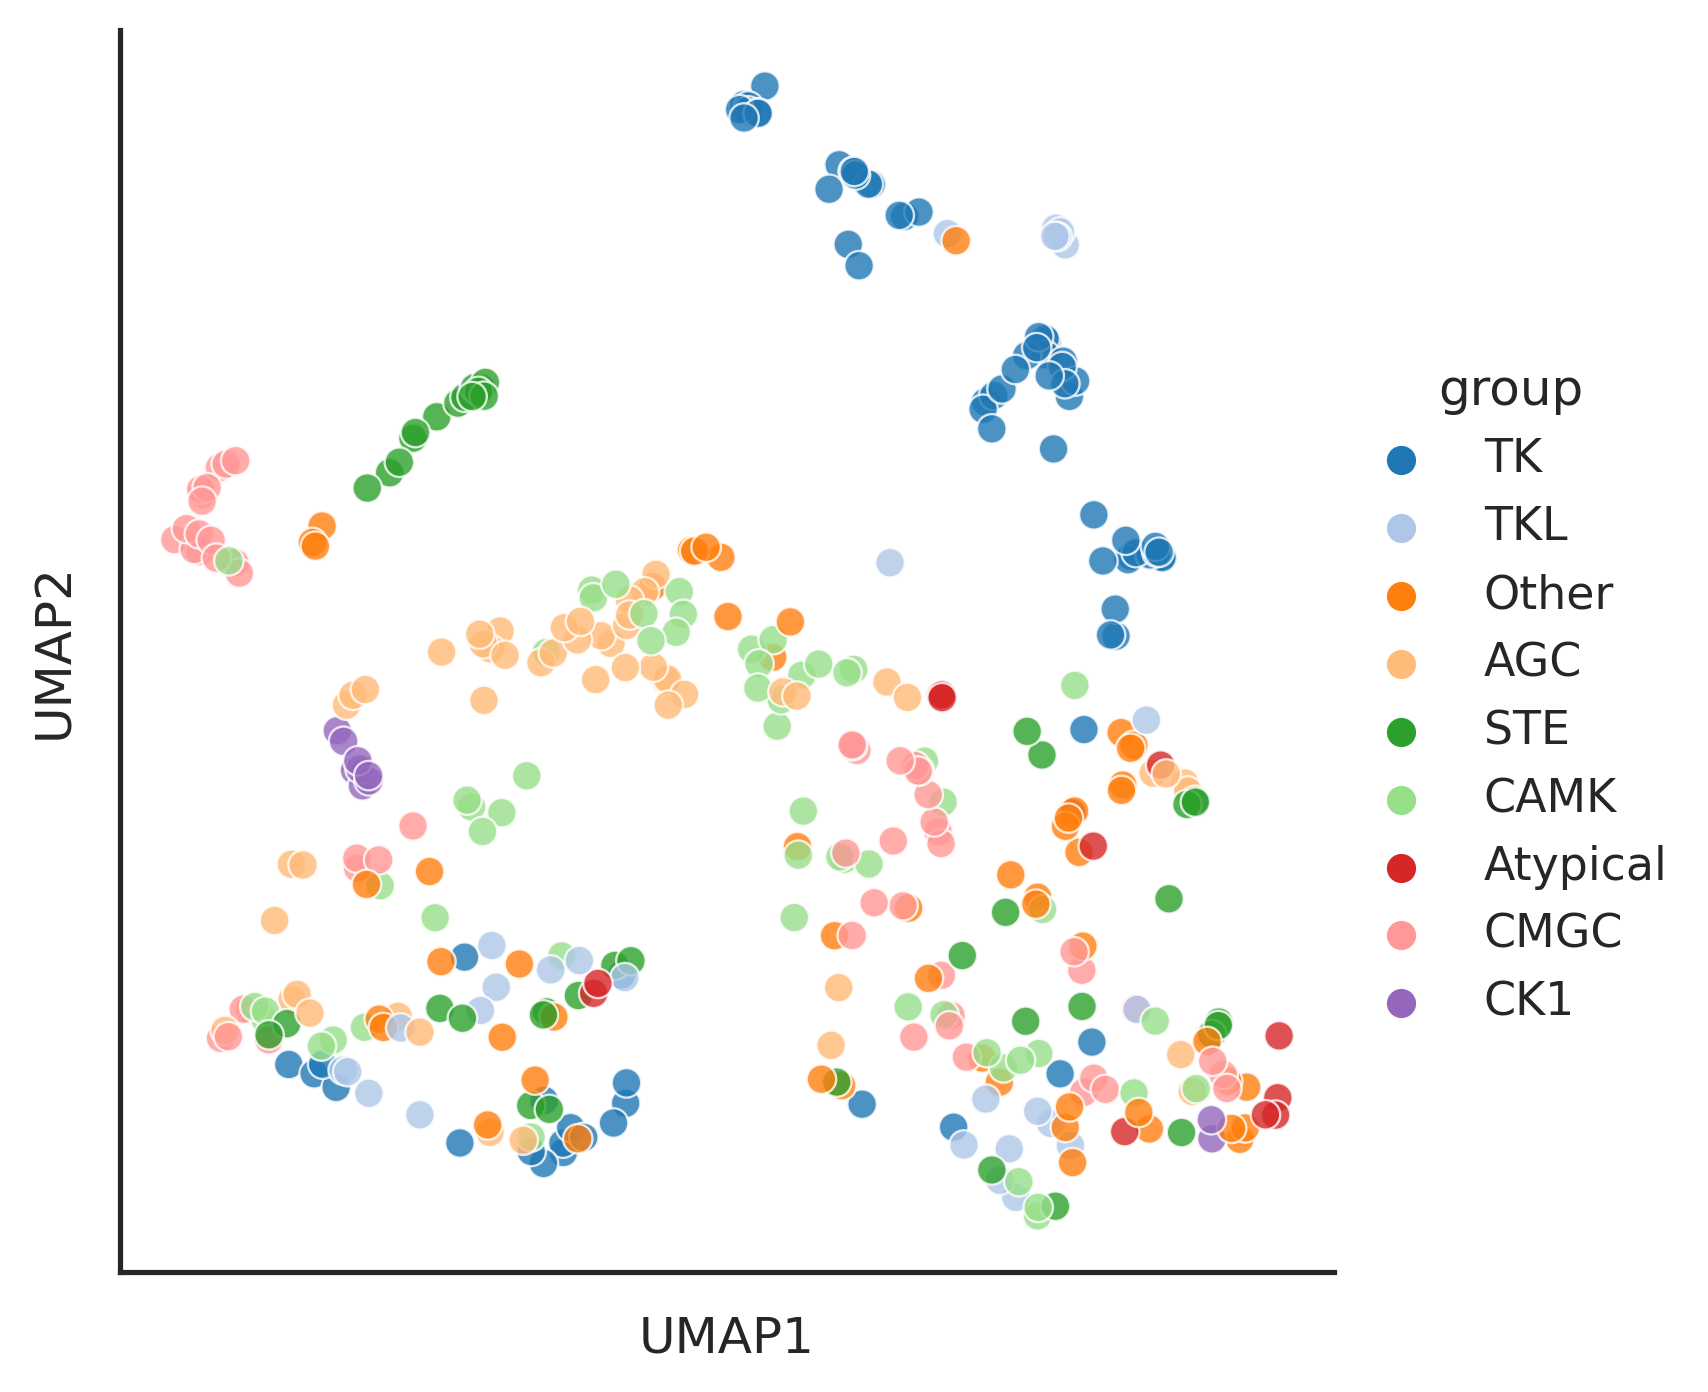

In [ ]:
plot_cluster(feat,'umap',complexity=10,hue=info.group,legend=True)

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


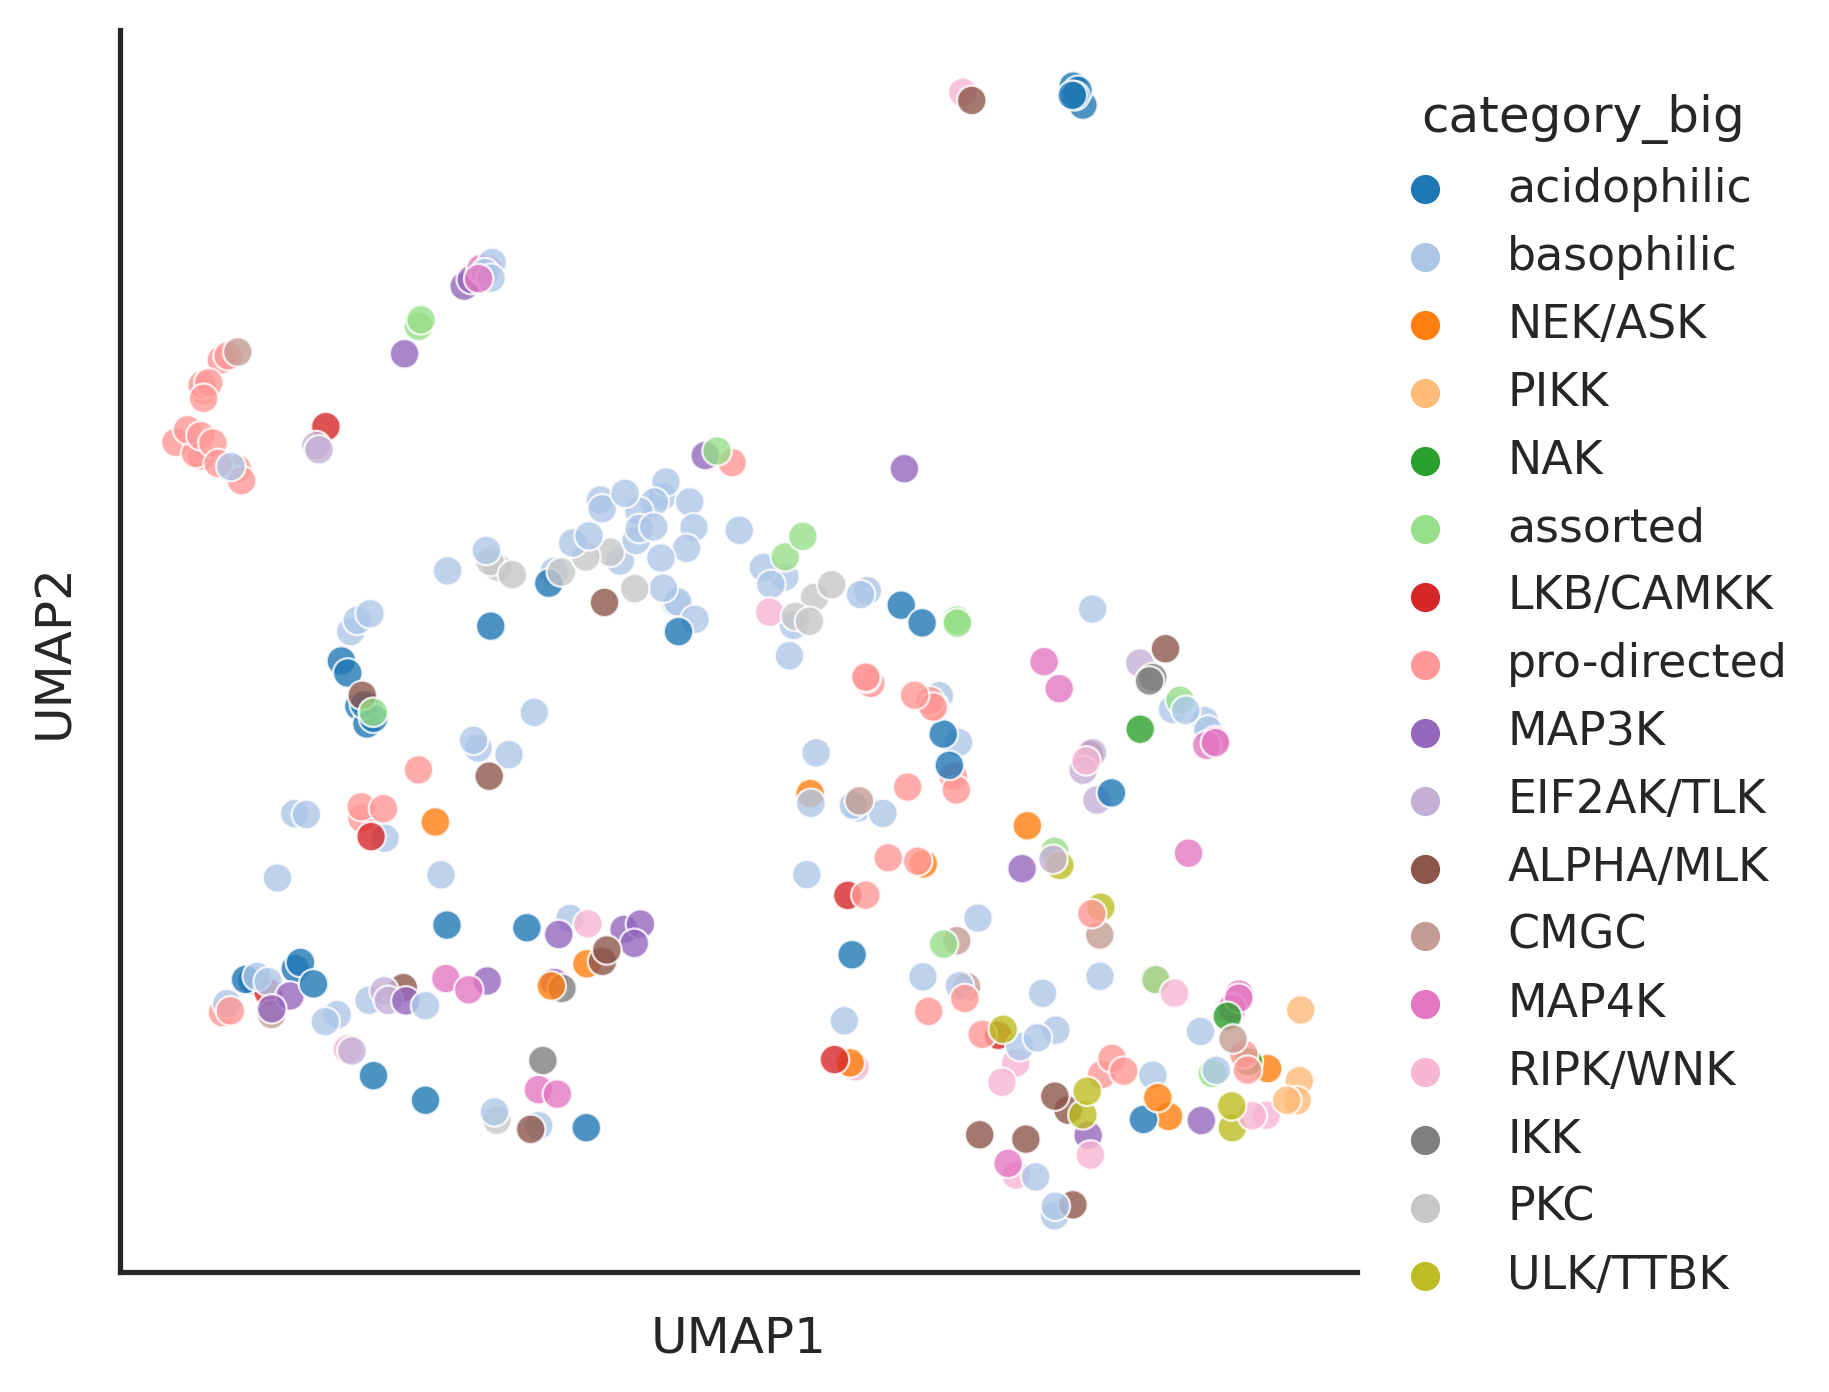

In [ ]:
plot_cluster(feat,'umap',complexity=10,hue=info.category_big,legend=True)

### Kinase domain

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


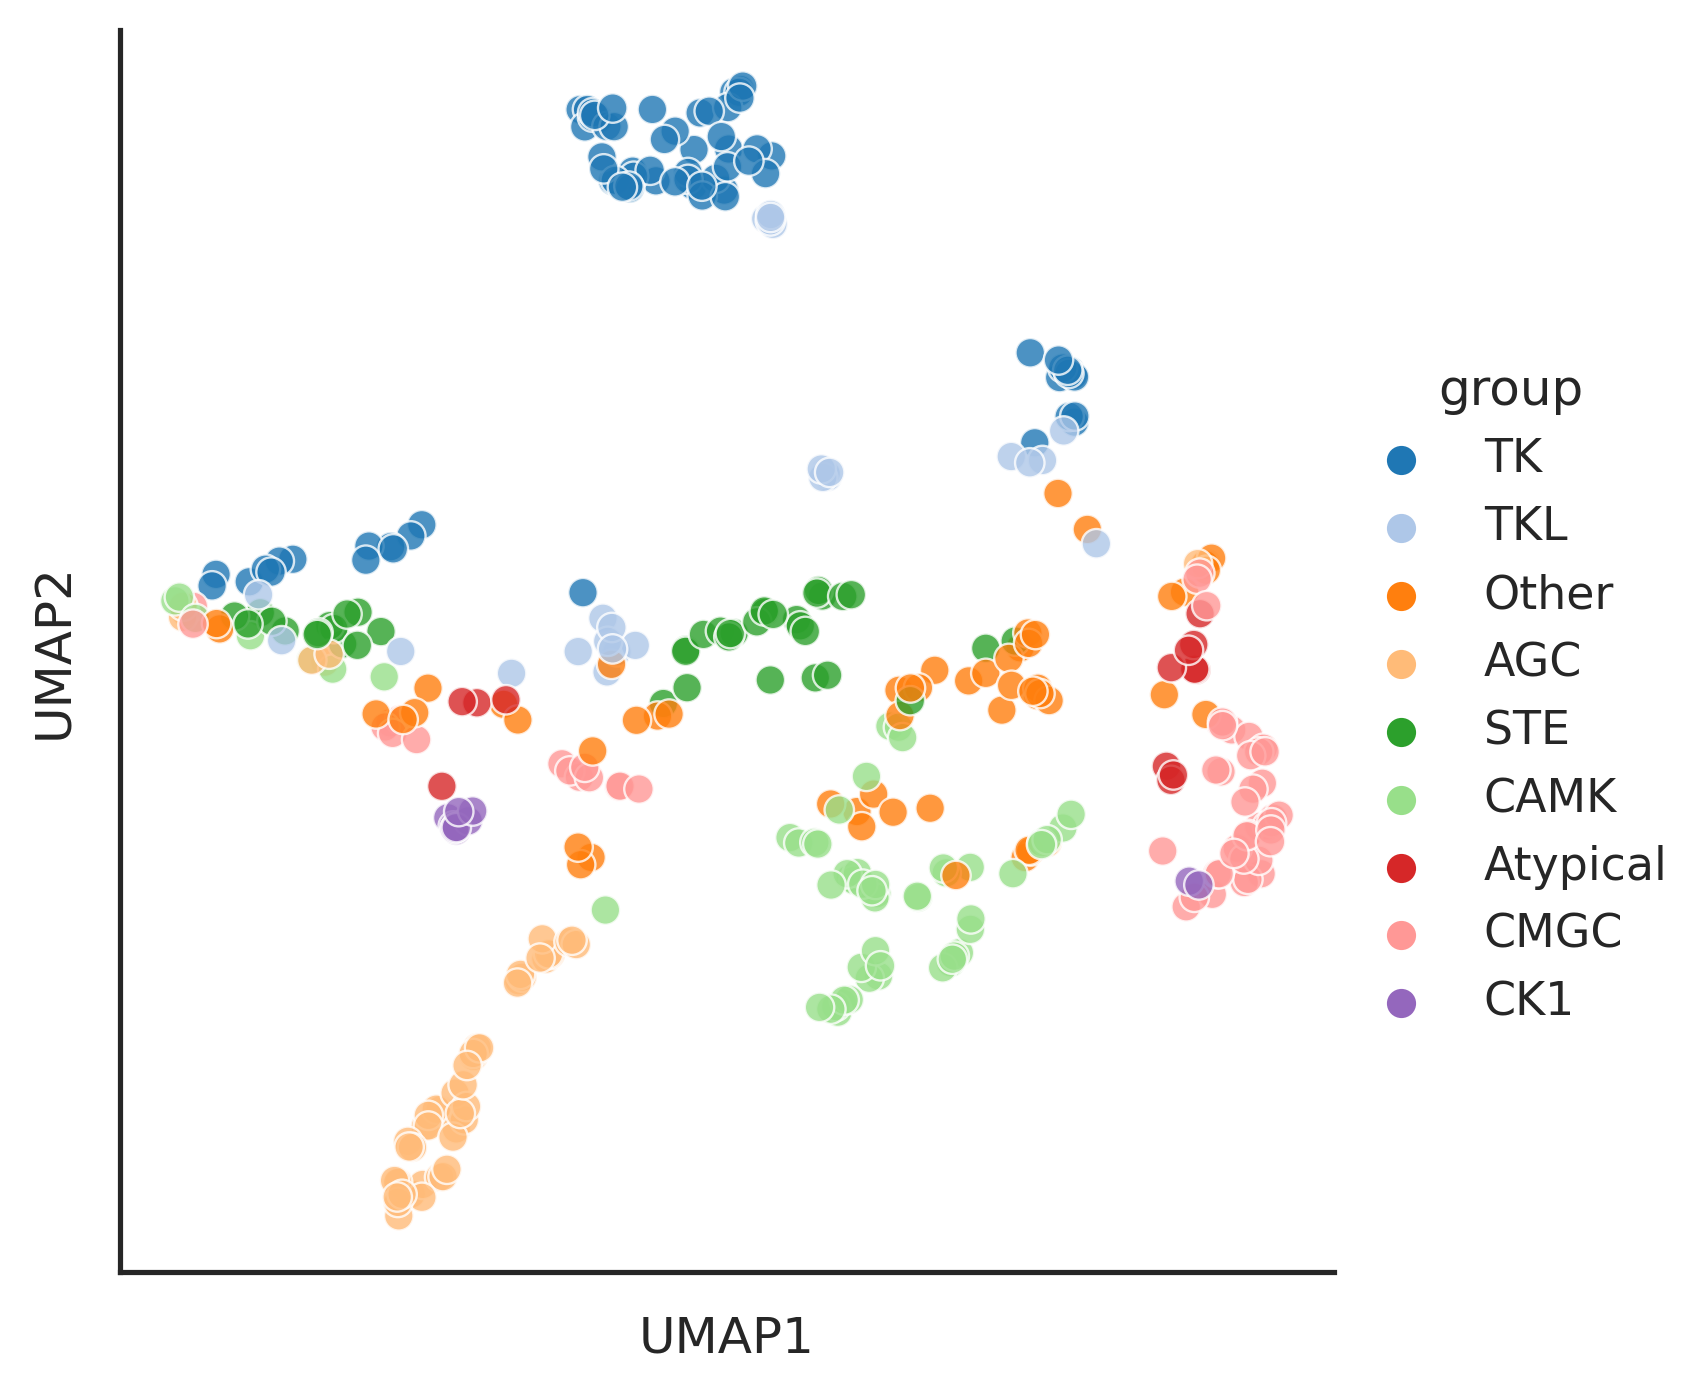

In [ ]:
plot_cluster(feat_kd,'umap',complexity=13,hue=info.group,legend=True)

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


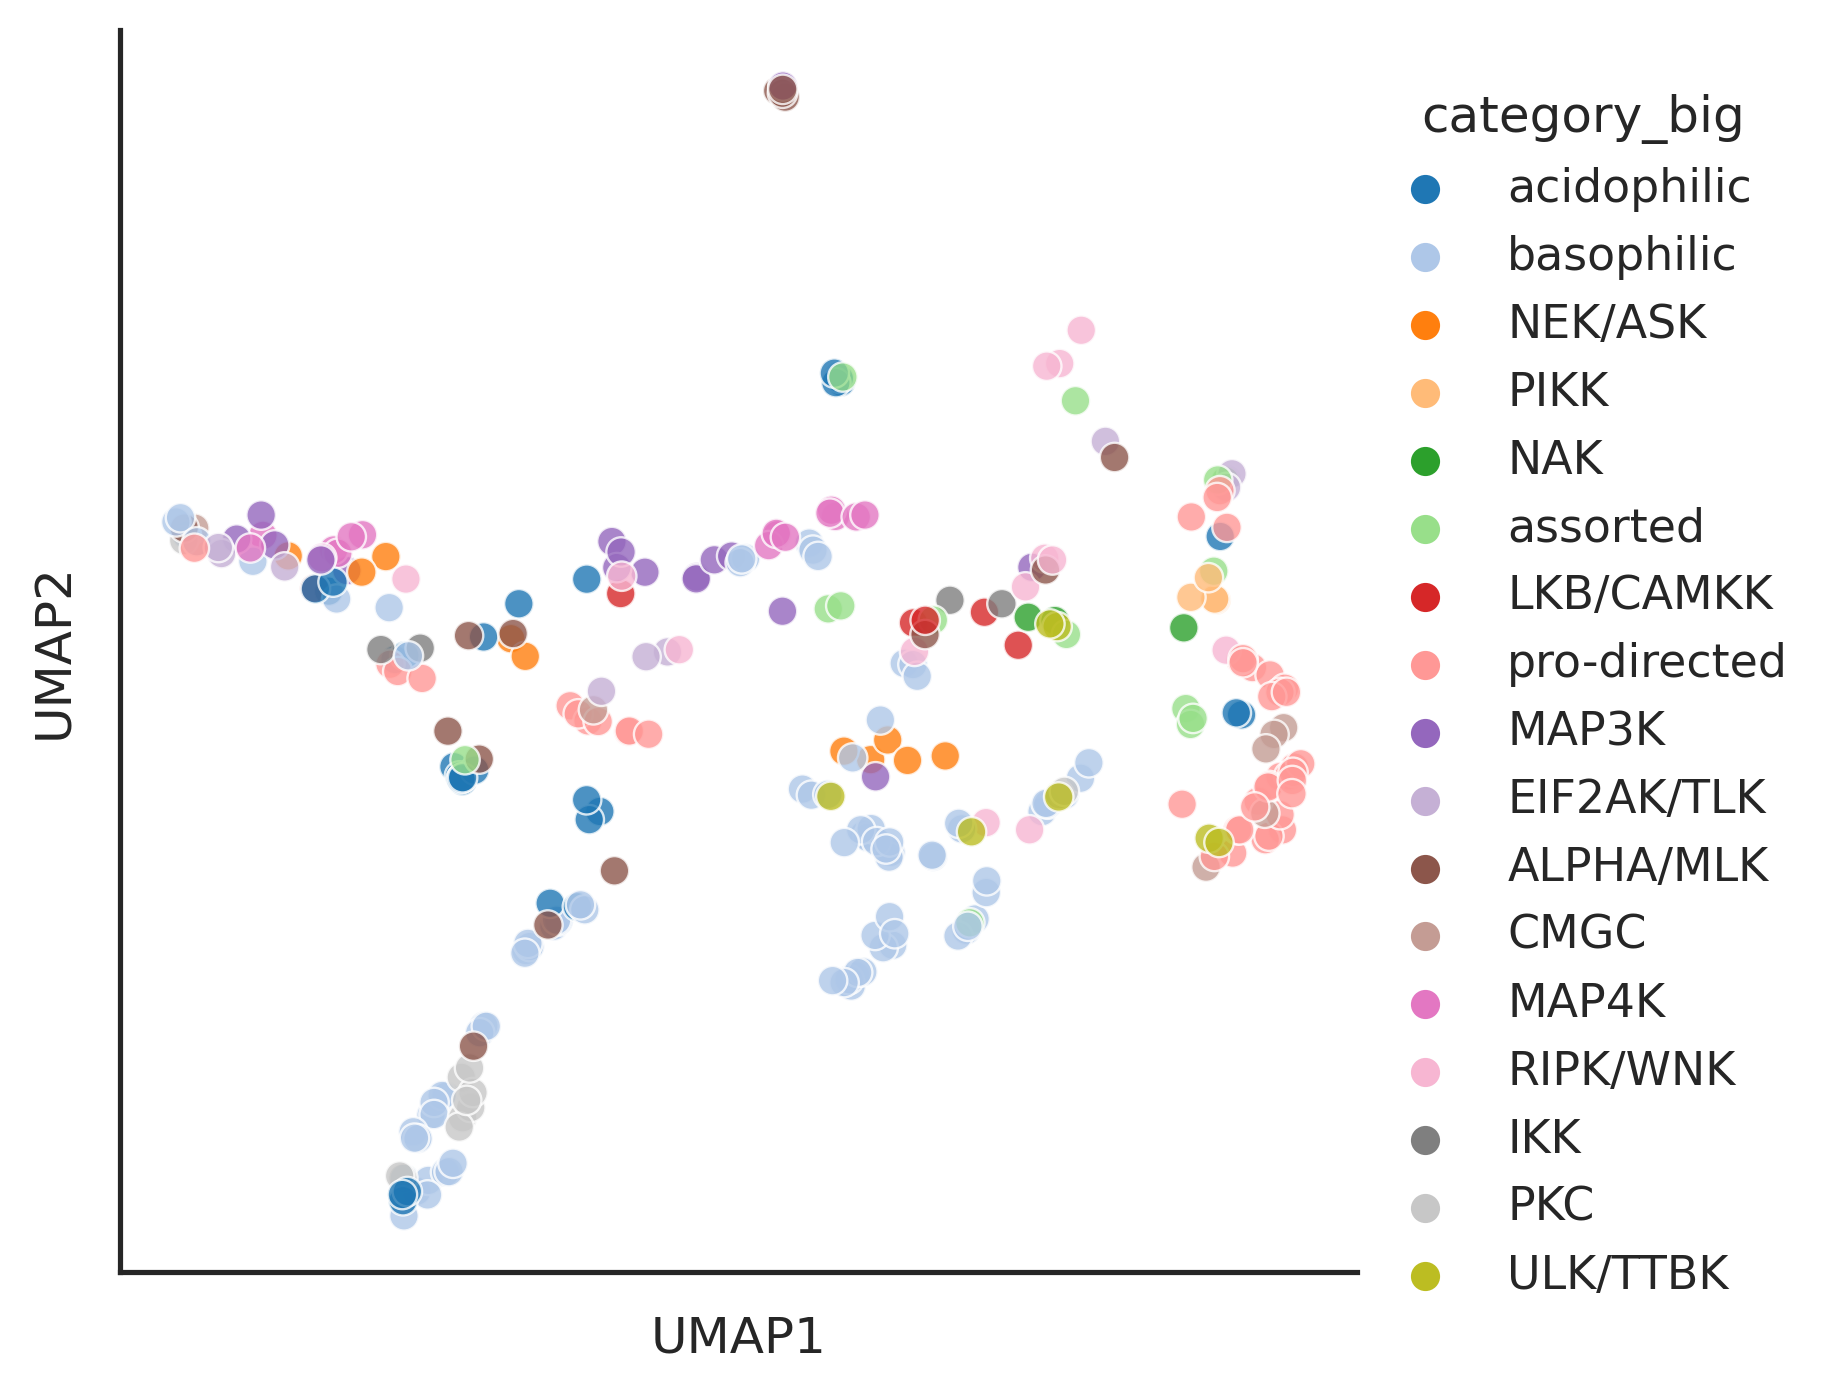

In [ ]:
plot_cluster(feat_kd,'umap',complexity=13,hue=info.category_big,legend=True)

## T5 plot

### Kinase

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


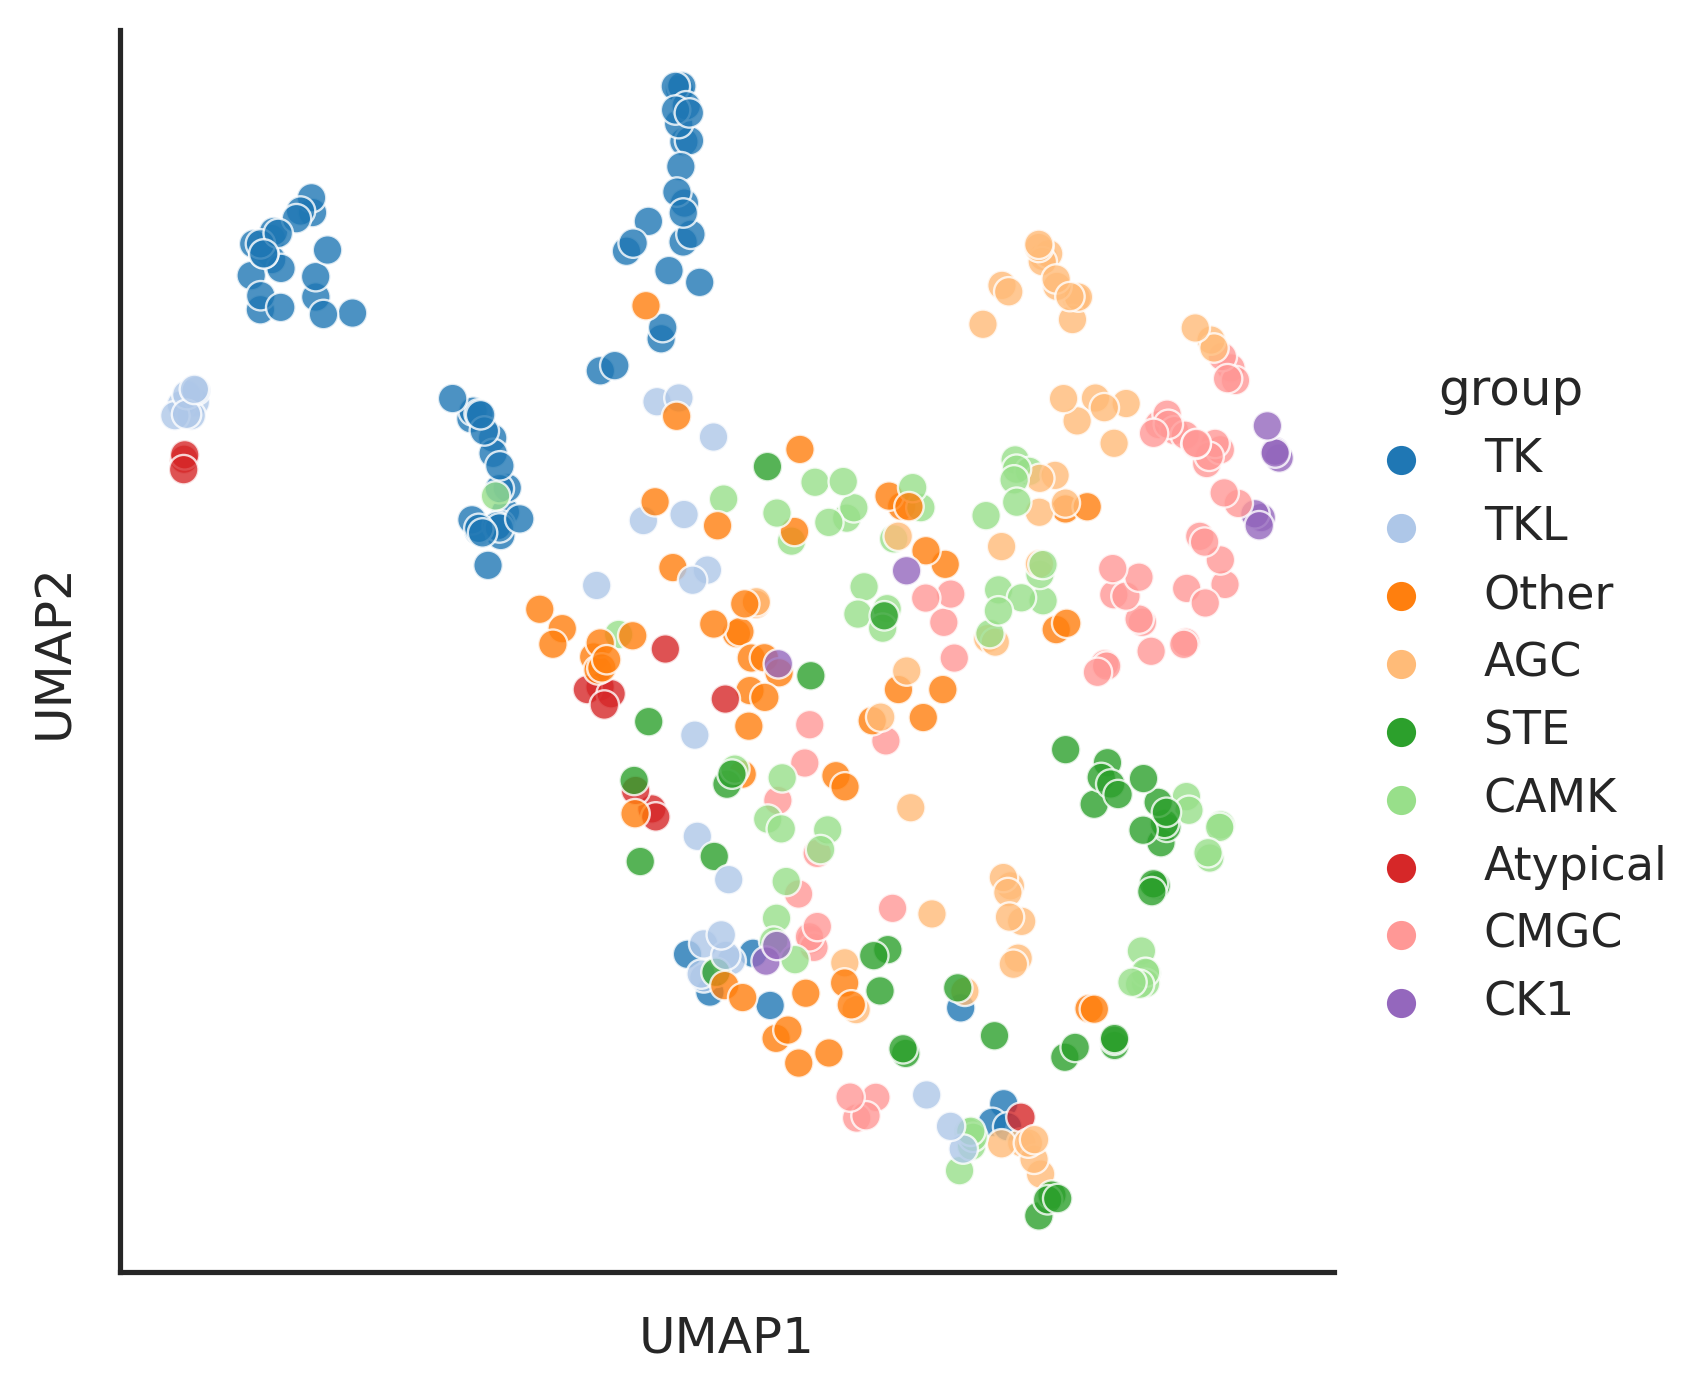

In [ ]:
plot_cluster(feat_t5,'umap',complexity=15,hue=info.group,legend=True)

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


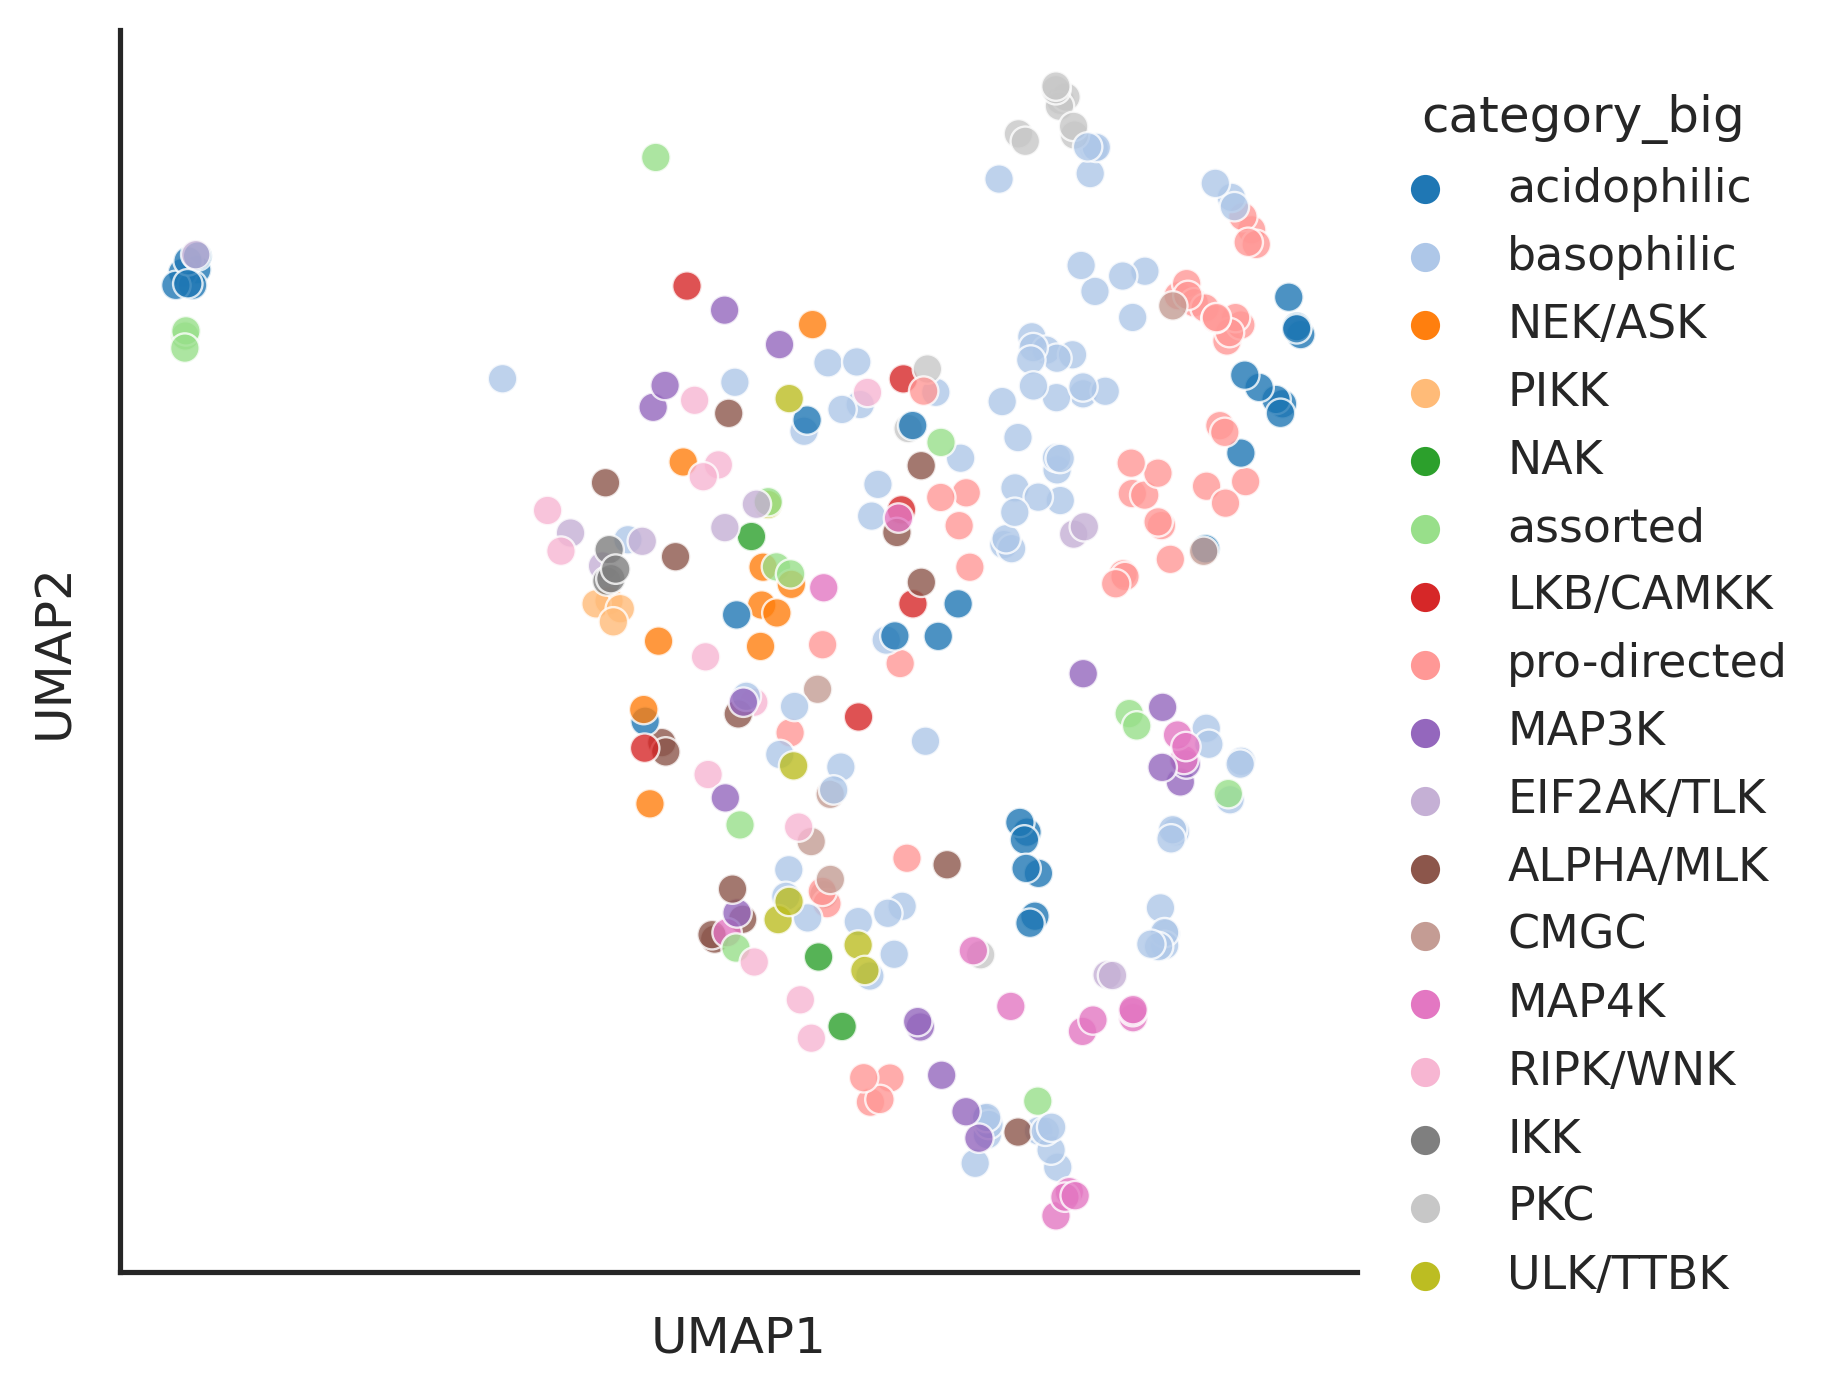

In [ ]:
plot_cluster(feat_t5,'umap',complexity=15,hue=info.category_big,legend=True)

### Kinase domain

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


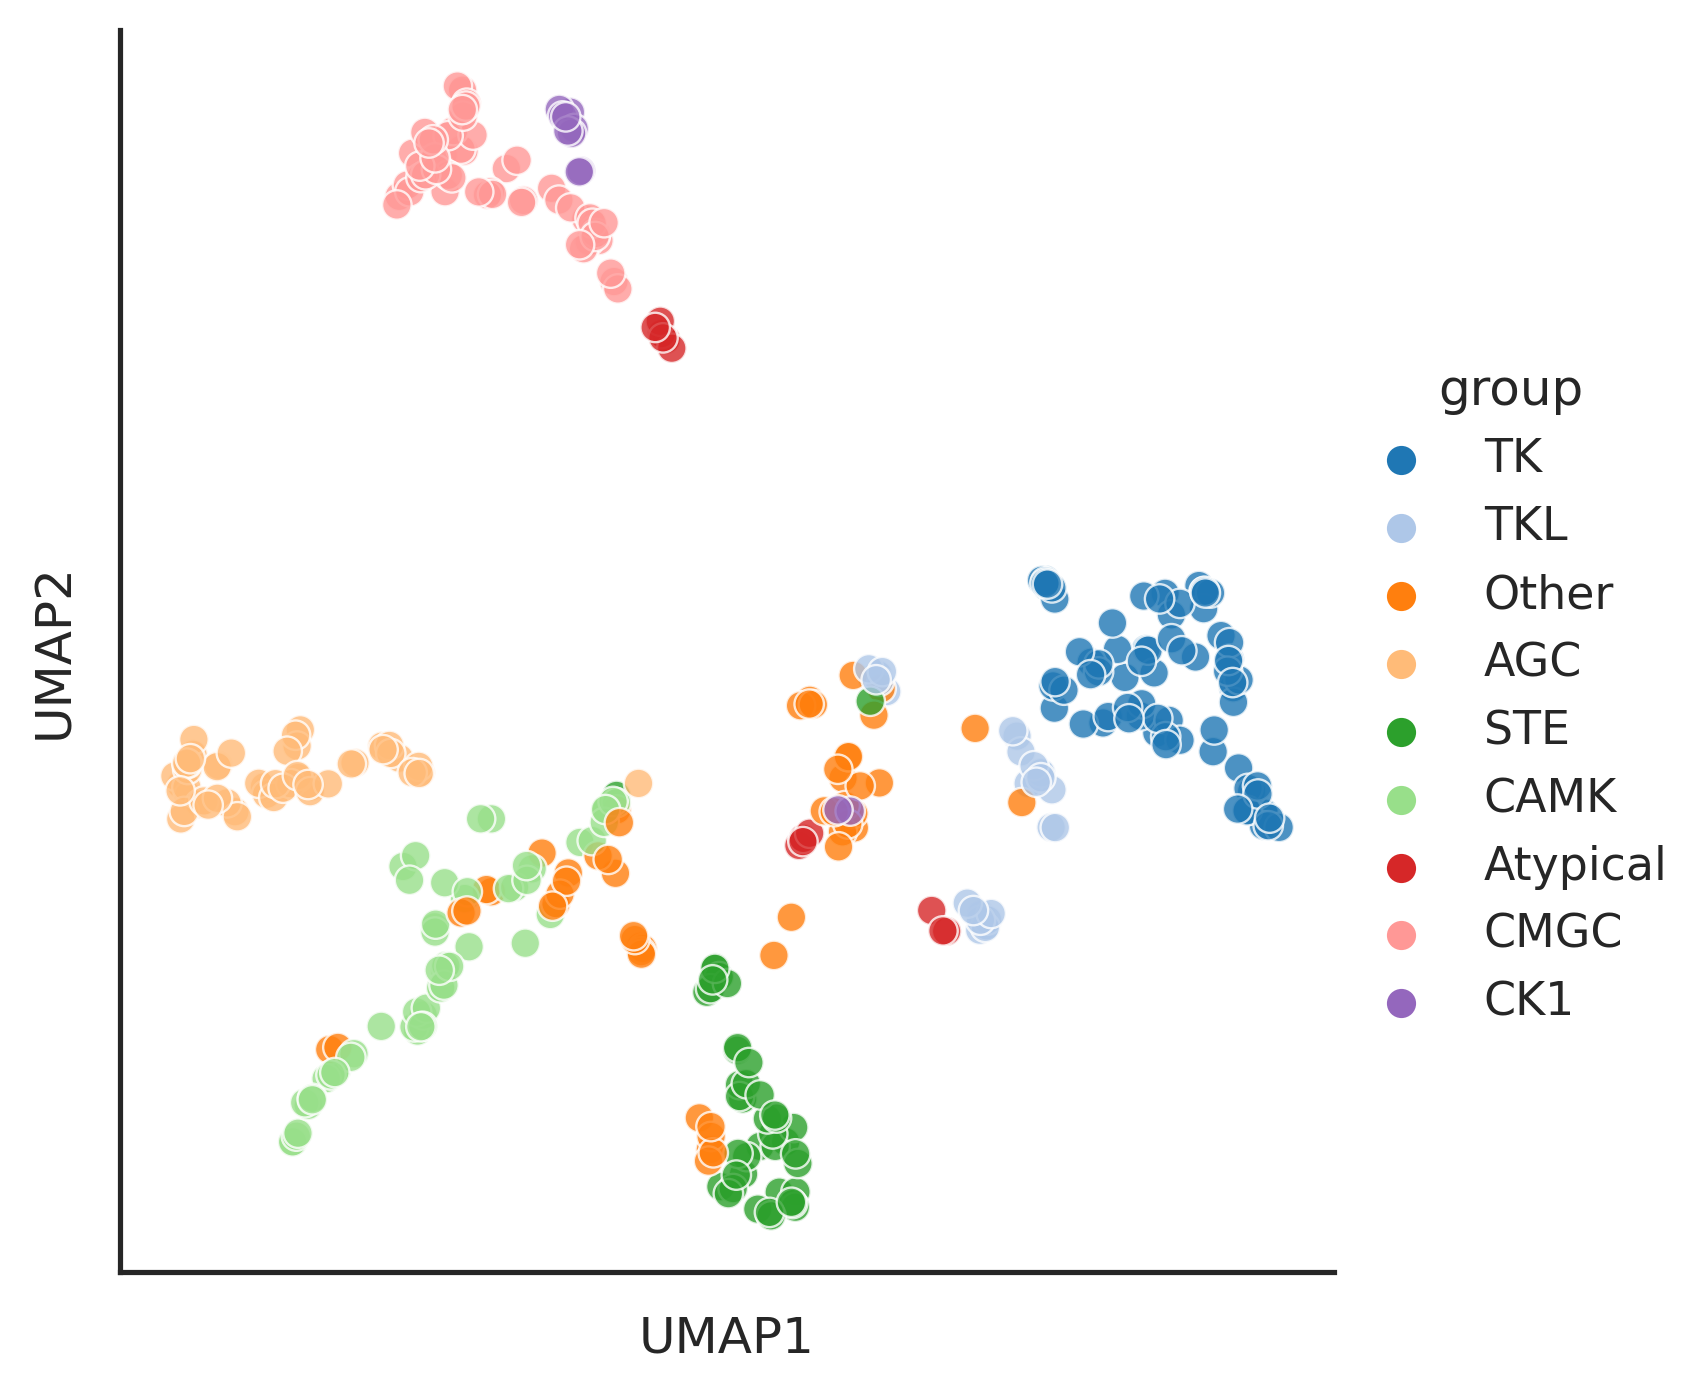

In [ ]:
plot_cluster(feat_kd_t5,'umap',complexity=13,hue=info.group,legend=True)

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


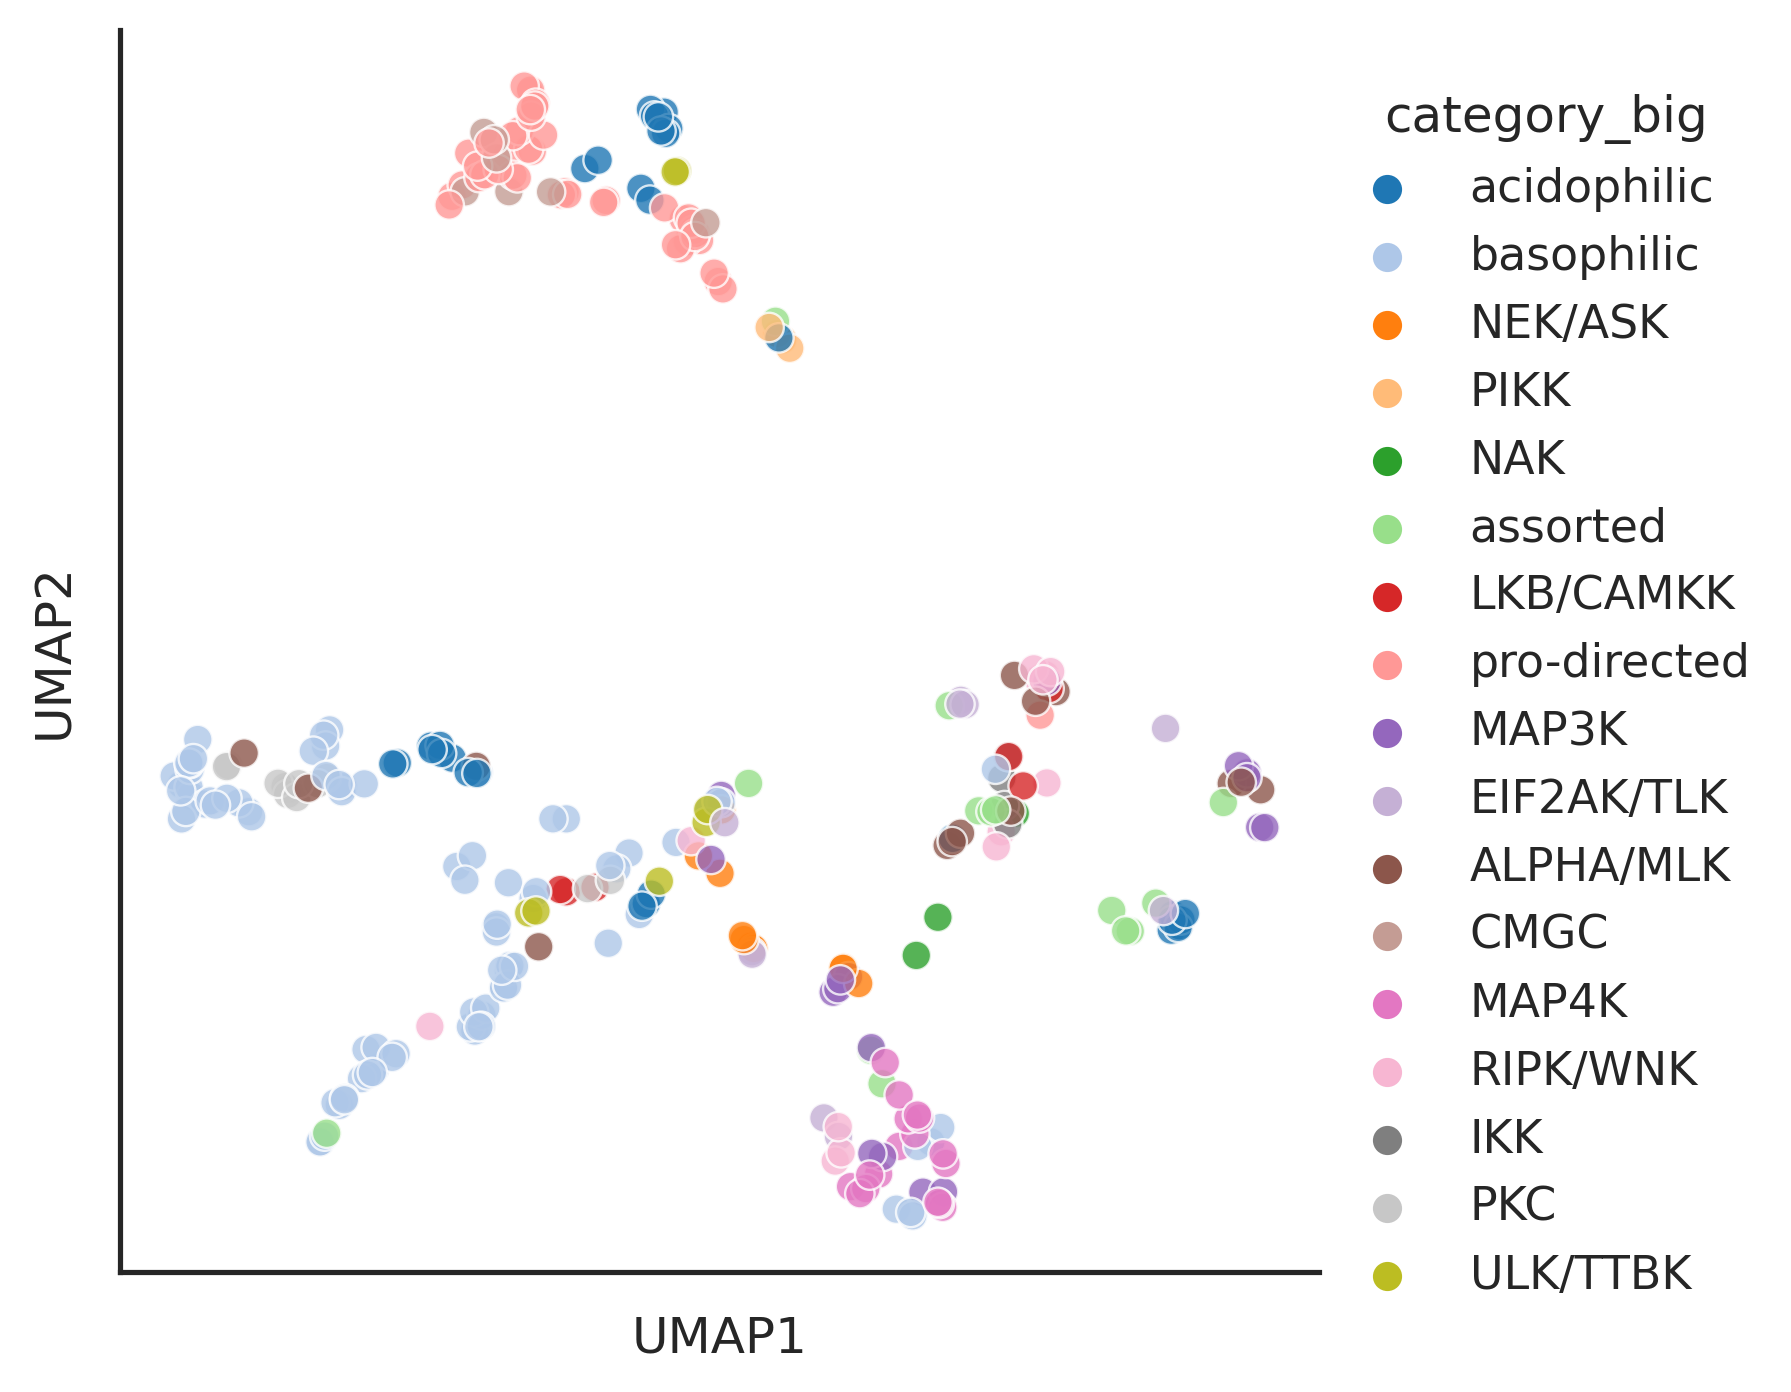

In [ ]:
plot_cluster(feat_kd_t5,'umap',complexity=13,hue=info.category_big,legend=True)

## Save Dataframes

In [ ]:
target = {'combine': target}

In [ ]:
kinase_all = {'esm':feat,'t5':feat_t5, 'esm_kd':feat_kd, 't5_kd': feat_kd_t5}

In [ ]:
dfs = {}
for i, t in target.items():
    for j, k in kinase_all.items():
        # df = t.merge(k).reset_index(drop=True)
        df = pd.concat([t,k],axis=1).set_index('kinase')
        dfs[i+'_'+j] = df
        # break

In [ ]:
dfs.keys()

dict_keys(['combine_esm', 'combine_t5', 'combine_esm_kd', 'combine_t5_kd'])

In [ ]:
for key, df in dfs.items():
    df.astype(float).to_parquet(f'raw/{key}.parquet')